This is the second notebook for the eda process on malaria incidence dataset and contains data cleaning and exploratory data analysis

In [1]:
# import exploratory data analysis libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the datasets in the /data/semi clean data folder
# the first file has 2 sheets

df1_1 = pd.read_excel(r'..\data\semi clean data\Predictive Modelling for Malaria Prevention - By Microscpy.xlsx',0)
df1_2 = pd.read_excel(r'..\data\semi clean data\Predictive Modelling for Malaria Prevention - By Microscpy.xlsx',1)

#display the first few rows of the df1_1 dataframe
df1_1.head()


,survey(MIS),county,Malaria prevalence according to microscopy
0,2022,Monrovia,0.7
1,2011,Monrovia,7.1
2,2022,South Central,11.3
3,2022,North Western,11.5
4,2022,South Eastern A,13.0


In [114]:
# group the data according to the counties and calculate the mean prevalence

gp=(df1_1[['county','Malaria prevalence according to microscopy']].groupby('county').mean().sort_values(by='Malaria prevalence according to microscopy',ascending=True))
gp

,Malaria prevalence according to microscopy
county,
Monrovia,7.633333
South Central,20.633333
North Western,22.766667
South Eastern A,24.333333
North Central,30.033333
South Eastern B,34.233333


Text(0, 0.5, 'prevalence(%) by microscopy')

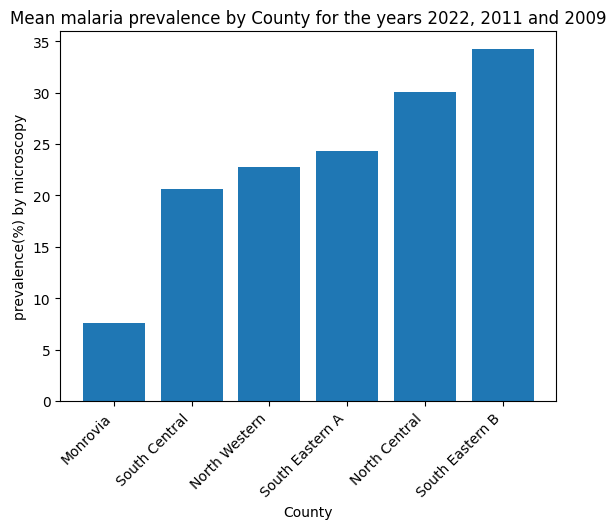

In [6]:
# visualize results on a bar plot.

plt.bar(gp.index, gp['Malaria prevalence according to microscopy'])
plt.title('Mean malaria prevalence by County for the years 2022, 2011 and 2009')
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('County')
plt.ylabel('prevalence(%) by microscopy')

In [7]:
# total malaria prevalence by microscopy for years:2009,2011,2022

df1_2

,survey(MIS),Malaria prevalence according to microscopy
0,2022,10.2
1,2011,27.8
2,2009,31.7


In [24]:
# this second dataset has statistics on some malaria indicators like insecticide treated nets, malaria treatment offered to children and pregnant women etc

df2 = pd.read_excel(r'..\data\semi clean data\Predictive Modelling for Malaria Prevention - Malaria Indicator Data2.xlsx')
df2

,Year,Households with at least one ITN (%),Households with at least one ITN for every two persons (%),Persons with access to an ITN (%),Population who slept under an ITN last night (%),Children under 5 who slept under an ITN (%),Children under 5 who slept under an ITN last night in a household with at least one ITN (%),Pregnant women who slept under an ITN,Pregnant women who slept under ITN last night of those living in a household with at least one ITN (%),SP/Fansidar 3+ doses during pregnancy (%),"SP/Fansidar 2+ doses, at least one during ANC visit(%)",Children with fever for whom advice or treatment was sought(%),Children who took any ACT (%),Children with hemoglobin lower than 8.0 g/dl (%),Malaria prevalence according to RDT (%),Malaria prevalence according to microscopy(%)
0,2009,47.2,11.9,25.4,22.8,26.4,51.4,32.9,63.2,11.0,45.1,78.3,44.5,4.7,36.5,31.7
1,2011,49.7,16.9,30.8,32.1,37.1,68.0,39.0,77.4,26.5,49.6,76.6,69.6,7.7,44.7,27.8
2,2013,54.6,22.1,37.0,31.7,38.1,63.2,37.1,63.2,17.9,47.6,77.9,42.9,NaN,NaN,NaN
3,2016,61.5,25.2,41.5,39.3,43.7,65.7,39.5,69.9,23.1,54.5,78.2,81.1,8.3,44.9,NaN
4,2019,54.7,25.2,39.7,39.0,44.3,71.7,46.5,78.2,40.3,69.2,80.9,41.2,8.9,NaN,NaN
5,2022,72.3,32.8,52.4,43.9,50.3,62.8,52.6,71.0,62.6,79.5,60.4,80.8,2.1,17.7,10.2


In [25]:
# check the null values for each column

df2.isna().sum()

Year                                                                                                      0
Households with at least one ITN (%)                                                                      0
Households with at least one ITN for every two persons (%)                                                0
Persons with access to an ITN (%)                                                                         0
Population who slept under an ITN last night (%)                                                          0
Children under 5 who slept under an ITN (%)                                                               0
Children under 5 who slept under an ITN last night in a household with at least one ITN (%)               0
Pregnant women who slept under an ITN                                                                     0
Pregnant women who slept under ITN last night of those living in a household with at least one ITN (%)    0
SP/Fansidar 3+ doses during 

In [28]:
# loop through all the columns with null values and fill them with their respective column means

columns = ['Children with hemoglobin lower than 8.0 g/dl (%)','Malaria prevalence according to RDT (%)','Malaria prevalence according to microscopy(%)']

for c in columns:
    df2[c] = df2[c].fillna(df2[c].mean())

In [30]:
# verify that no missing data exist in any column now.

df2.isna().sum()

Year                                                                                                      0
Households with at least one ITN (%)                                                                      0
Households with at least one ITN for every two persons (%)                                                0
Persons with access to an ITN (%)                                                                         0
Population who slept under an ITN last night (%)                                                          0
Children under 5 who slept under an ITN (%)                                                               0
Children under 5 who slept under an ITN last night in a household with at least one ITN (%)               0
Pregnant women who slept under an ITN                                                                     0
Pregnant women who slept under ITN last night of those living in a household with at least one ITN (%)    0
SP/Fansidar 3+ doses during 

In [ ]:
# visualize the various variables on a line chart to observe trends among years present in the data

df2.plot(kind = 'line',figsize=(13,10), x='Year', y=['Households with at least one ITN (%)','Children under 5 who slept under an ITN last night in a household with at least one ITN (%)','Pregnant women who slept under ITN last night of those living in a household with at least one ITN (%)'],marker ='*')

In [ ]:
# visualize the various variables on a line chart to observe trends among years present in the data

df2.plot(kind = 'line',figsize=(10,7), x='Year', y=['Persons with access to an ITN (%)','Population who slept under an ITN last night (%)'],marker ='*')

In [ ]:
# visualize the various variables on a line chart to observe trends among years present in the data

df2.plot(kind = 'line',figsize=(10,7), x='Year', y=['Children under 5 who slept under an ITN (%)','Children under 5 who slept under an ITN last night in a household with at least one ITN (%)'],marker ='*')

In [ ]:
# visualize the various variables on a line chart to observe trends among years present in the data

df2.plot(kind = 'line',figsize=(10,7), x='Year', y=['Pregnant women who slept under an ITN','Pregnant women who slept under ITN last night of those living in a household with at least one ITN (%)'],marker ='*')

In [ ]:
# visualize the various variables on a line chart to observe trends among years present in the data

df2.plot(kind = 'line',figsize=(10,7), x='Year', y=['SP/Fansidar 3+ doses during pregnancy (%)','SP/Fansidar 2+ doses, at least one during ANC visit(%)'],marker ='*')

In [ ]:
# visualize the various variables on a line chart to observe trends among years present in the data

df2.plot(kind = 'line',figsize=(10,7), x='Year', y=['Children with fever for whom advice or treatment was sought(%)','Children who took any ACT (%)','Children with hemoglobin lower than 8.0 g/dl (%)'],marker ='*')

In [ ]:
# visualize the various variables on a line chart to observe trends among years present in the data

df2.plot(kind = 'line',figsize=(10,7), x='Year', y=['Malaria prevalence according to microscopy(%)','Malaria prevalence according to RDT (%)'],marker ='*')

In [88]:
# look at the correlation among variables in this dataframe

correlation = df2.corr()
correlation

#sns.heatmap(correlation, annot=True)

,Year,Households with at least one ITN (%),Households with at least one ITN for every two persons (%),Persons with access to an ITN (%),Population who slept under an ITN last night (%),Children under 5 who slept under an ITN (%),Children under 5 who slept under an ITN last night in a household with at least one ITN (%),Pregnant women who slept under an ITN,Pregnant women who slept under ITN last night of those living in a household with at least one ITN (%),SP/Fansidar 3+ doses during pregnancy (%),"SP/Fansidar 2+ doses, at least one during ANC visit(%)",Children with fever for whom advice or treatment was sought(%),Children who took any ACT (%),Children with hemoglobin lower than 8.0 g/dl (%),Malaria prevalence according to RDT (%),Malaria prevalence according to microscopy(%)
Year,1.000000,0.868504,0.959874,0.945376,0.938757,0.939486,0.499770,0.948333,0.399101,0.901167,0.953534,-0.581937,0.378891,-0.206419,-0.642517,-0.895914
Households with at least one ITN (%),0.868504,1.000000,0.933721,0.967816,0.862669,0.867821,0.214291,0.811834,0.086980,0.808354,0.798632,-0.802249,0.660832,-0.477967,-0.684249,-0.957826
Households with at least one ITN for every two persons (%),0.959874,0.933721,1.000000,0.993380,0.955685,0.970116,0.494765,0.888647,0.277252,0.842853,0.860272,-0.627767,0.482251,-0.232616,-0.607401,-0.947437
Persons with access to an ITN (%),0.945376,0.967816,0.993380,1.000000,0.937444,0.951020,0.410980,0.883510,0.222365,0.852469,0.858322,-0.702658,0.540139,-0.326138,-0.653679,-0.969849
Population who slept under an ITN last night (%),0.938757,0.862669,0.955685,0.937444,1.000000,0.993831,0.663112,0.889139,0.512311,0.835067,0.846905,-0.522805,0.578672,-0.031204,-0.420017,-0.855424
Children under 5 who slept under an ITN (%),0.939486,0.867821,0.970116,0.951020,0.993831,1.000000,0.665531,0.898855,0.482181,0.846973,0.846435,-0.549661,0.541207,-0.067135,-0.463132,-0.885481
Children under 5 who slept under an ITN last night in a household with at least one ITN (%),0.499770,0.214291,0.494765,0.410980,0.663112,0.665531,1.000000,0.503520,0.809695,0.409788,0.402819,0.121420,0.170564,0.611803,0.190562,-0.290727
Pregnant women who slept under an ITN,0.948333,0.811834,0.888647,0.883510,0.889139,0.898855,0.503520,1.000000,0.529595,0.988220,0.982659,-0.692801,0.408745,-0.302072,-0.703878,-0.891107
Pregnant women who slept under ITN last night of those living in a household with at least one ITN (%),0.399101,0.086980,0.277252,0.222365,0.512311,0.482181,0.809695,0.529595,1.000000,0.496478,0.469743,0.008296,0.249378,0.449983,0.129254,-0.155318
SP/Fansidar 3+ doses during pregnancy (%),0.901167,0.808354,0.842853,0.852469,0.835067,0.846973,0.409788,0.988220,0.496478,1.000000,0.969721,-0.777423,0.449394,-0.414115,-0.756586,-0.891600


In [90]:
# look at the third dataset: it has data on year, population, number of malaria cases and number of deaths

df3 = pd.read_csv(r'..\data\semi clean data\Predictive Modelling for Malaria Prevention - Population denominator for case incidence .csv')
df3

,Year,Population denominator for incidence and mortality rate,Cases(lower),Cases(point),Cases(upper),Deaths(lower),Deaths(point),Deaths(upper)
0,2000,2895224,784000,1248403,1870000,5520,5872,6250
1,2001,2981648,830000,1311933,1965000,5360,5697,6070
2,2002,3060599,838000,1343961,2049000,5040,5355,5700
3,2003,3085173,843000,1339076,2021000,4600,4887,5200
4,2004,3122447,831000,1270287,1886000,3560,3778,4020
5,2005,3266318,886000,1269211,1765000,3720,3956,4210
6,2006,3455397,956000,1300190,1722000,3130,3326,3530
7,2007,3632740,1020000,1347464,1742000,2960,3144,3340
8,2008,3783887,1090000,1403261,1770000,3320,3546,3780
9,2009,3905066,1073000,1384603,1769000,2970,3161,3370


In [ ]:
# visualize the various variables on a line chart to observe trends among years present in the data

df3.plot(kind = 'line',figsize=(10,7), x='Year', y=['Cases(point)','Deaths(point)'],marker ='*',label=['malaria cases','deaths'])
plt.title('Malaria cases vs deaths')

In [96]:
# df4 is a workbook with 3 sheets
# first save the workbook in a variable

xls = pd.ExcelFile(r'..\data\semi clean data\Predictive Modelling for Malaria Prevention - Rapid Diagnostic Tests (RDTs).xlsx')

# read the different sheets starting from index 0-2
df4_1 = pd.read_excel(xls,0)
df4_2 = pd.read_excel(xls,1)
df4_3 = pd.read_excel(xls,2)

In [97]:
# load the first sheet

df4_1

,survey (MIS),age_group(months),malaria prevalence according to RDT,CI
0,2022,6-8,5.1,1.1-9.1
1,2022,9-11,5.2,1.1-9.3
2,2022,12-17,8.8,5.3-12.3
3,2022,18-23,12.4,7.5-17.2
4,2022,24-35,18.9,13.8-24.0
5,2022,36-47,20.9,15.0-26.7
6,2022,48-59,26.4,20.9-32.0
7,2016,6-8,29.9,20.1-39.7
8,2016,9-11,24.1,14.6-33.5
9,2016,12-17,30.7,21.3-40.0


In [103]:
# group the data according to the age group

gp = (df4_1[['age_group(months)', 'malaria prevalence according to RDT']].groupby('age_group(months)').mean().sort_values(by='malaria prevalence according to RDT'))
gp

,malaria prevalence according to RDT
age_group(months),
6-8,15.175
9-11,21.575
12-17,25.475
18-23,30.700
24-35,37.600
36-47,41.775
48-59,44.750


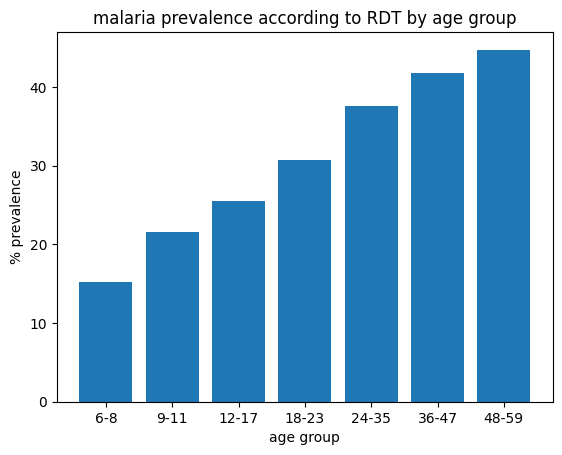

In [109]:
# visualize malaria prevalence by age group

plt.bar(gp.index, gp['malaria prevalence according to RDT'])
plt.title('malaria prevalence according to RDT by age group')
plt.xlabel('age group')
plt.ylabel('% prevalence')
plt.show()

In [110]:
df4_2

,survey (MIS),counties,malaria prevalence according to RDT,CI
0,2022,Monrovia,4.1,1.0-7.2
1,2022,North Western,19.5,14.5-24.5
2,2022,South Central,17.3,8.6-25.9
3,2022,South Eastern A,23.4,11.5-35.3
4,2022,South Eastern B,32.8,28.7-36.9
5,2022,North Central,22.2,16.6-27.7
6,2016,Monrovia,12.4,9.2-15.6
7,2016,North Western,46.1,39.0-53.3
8,2016,South Central,52.1,42.7-61.5
9,2016,South Eastern A,58.4,48.2-68.5


In [115]:
# group the data according to the counties and calculate the mean prevalence

gp1=(df4_2[['counties','malaria prevalence according to RDT']].groupby('counties').mean().sort_values(by='malaria prevalence according to RDT',ascending=True))
gp1

,malaria prevalence according to RDT
counties,
Monrovia,12.800
North Western,37.100
South Central,37.775
South Eastern A,41.675
North Central,44.800
South Eastern B,53.875


Text(0, 0.5, 'prevalence(%) by RDTs')

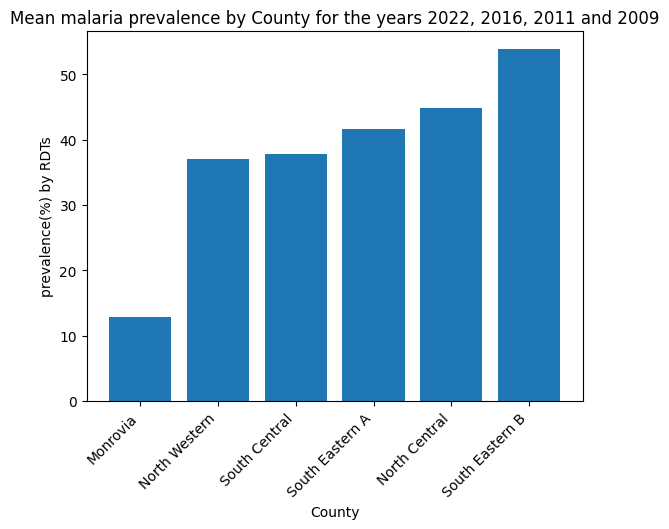

In [120]:
# visualize results on a bar plot.

#plt.bar(gp.index, gp['Malaria prevalence according to microscopy'])
plt.bar(gp1.index, gp1['malaria prevalence according to RDT'])
plt.title('Mean malaria prevalence by County for the years 2022, 2016, 2011 and 2009')
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('County')
plt.ylabel('prevalence(%) by RDTs')

In [121]:
# load the third sheet in this file, it has prevalence totals for the years

df4_3

,survey(MIS),malaria prevalence according to RDT,CI
0,2022,17.7,14.5-21.0
1,2016,44.9,38.8-51.0
2,2011,44.7,40.1-49.2
3,2009,36.5,31.8-41.3


In [122]:
# read the 5th dataset
df5 = pd.read_excel(r'..\data\semi clean data\Predictive Modelling for Malaria Prevention - Reported Malaria deaths, 2010-2022.xlsx')
df5

,Year,Deaths
0,2010,1422.0
1,2011,NaN
2,2012,1725.0
3,2013,1191.0
4,2014,2288.0
5,2015,1379.0
6,2016,1259.0
7,2017,758.0
8,2018,NaN
9,2019,602.0


In [124]:
# handle the missing data

df5['Deaths']= df5['Deaths'].fillna(df5['Deaths'].mean())
df5

,Year,Deaths
0,2010,1422.0
1,2011,1122.5
2,2012,1725.0
3,2013,1191.0
4,2014,2288.0
5,2015,1379.0
6,2016,1259.0
7,2017,758.0
8,2018,1122.5
9,2019,602.0


In [131]:
# simple discriptive task

df5.describe()

,Year,Deaths
count,13.00000,13.000000
mean,2016.00000,1122.500000
std,3.89444,552.334025
min,2010.00000,248.000000
25%,2013.00000,758.000000
50%,2016.00000,1122.500000
75%,2019.00000,1379.000000
max,2022.00000,2288.000000


In [ ]:
# draw a line chart for the data

df5.plot(kind = 'line', figsize=(10,7), x='Year', y='Deaths', marker='*',color='red')
plt.title('Trends in malaria deaths')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

<Axes: >

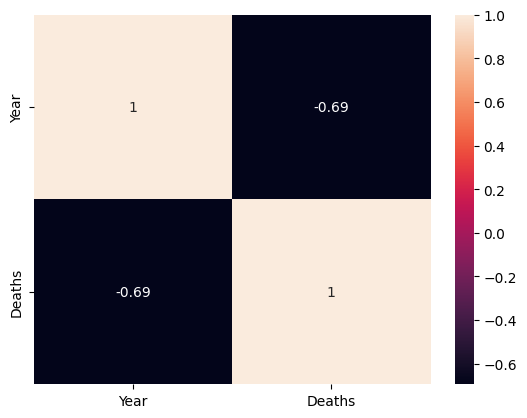

In [147]:
# correlation
corr = df5.corr()

sns.heatmap(corr, annot=True)

Negative strong correlation exist

In [132]:
# read the 6th dataset
df6 = pd.read_excel(r'..\data\semi clean data\Predictive Modelling for Malaria Prevention - Reported maralia cases by species, 2010-2022.xlsx')
df6 

,Year,Indigenous,P.falciparum,P.vivax,Mixed cases,Other cases
0,2010,922173.0,212927.0,NaN,0.0,0
1,2011,1921159.0,577641.0,NaN,NaN,0
2,2012,1412629.0,1407455.0,NaN,NaN,0
3,2013,1244220.0,1244220.0,NaN,NaN,0
4,2014,881224.0,864204.0,NaN,NaN,0
5,2015,941711.0,NaN,NaN,0.0,0
6,2016,1191137.0,809356.0,NaN,0.0,0
7,2017,1093115.0,NaN,NaN,0.0,0
8,2018,NaN,NaN,NaN,0.0,0
9,2019,915845.0,915845.0,NaN,0.0,0


In [134]:
# drop columns p.vivax, mixed cases, other cases

df6 = df6[['Year','Indigenous','P.falciparum']]
df6

,Year,Indigenous,P.falciparum
0,2010,922173.0,212927.0
1,2011,1921159.0,577641.0
2,2012,1412629.0,1407455.0
3,2013,1244220.0,1244220.0
4,2014,881224.0,864204.0
5,2015,941711.0,NaN
6,2016,1191137.0,809356.0
7,2017,1093115.0,NaN
8,2018,NaN,NaN
9,2019,915845.0,915845.0


In [138]:
# handle missing data: fill with the mean

df6['Indigenous'] = df6['Indigenous'].fillna(df6['Indigenous'].mean())
df6['P.falciparum'] = df6['P.falciparum'].fillna(df6['P.falciparum'].mean())
df6

,Year,Indigenous,P.falciparum
0,2010,9.221730e+05,2.129270e+05
1,2011,1.921159e+06,5.776410e+05
2,2012,1.412629e+06,1.407455e+06
3,2013,1.244220e+06,1.244220e+06
4,2014,8.812240e+05,8.642040e+05
5,2015,9.417110e+05,8.489742e+05
6,2016,1.191137e+06,8.093560e+05
7,2017,1.093115e+06,8.489742e+05
8,2018,1.102939e+06,8.489742e+05
9,2019,9.158450e+05,9.158450e+05


<Axes: >

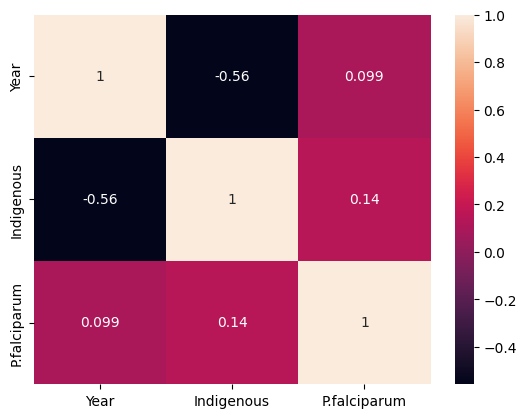

In [148]:
# correlation
c = df6.corr()
sns.heatmap(c, annot=True)

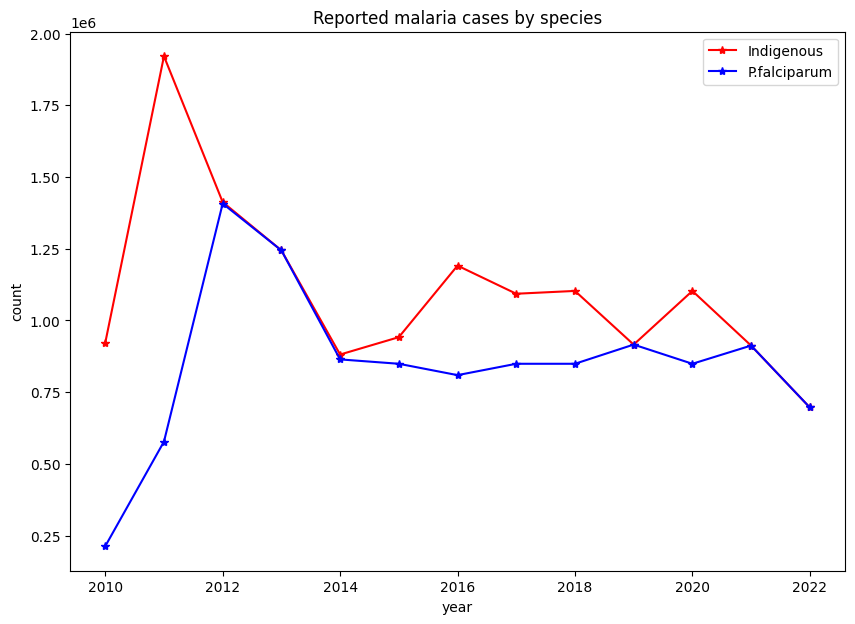

In [144]:

df6.plot(kind = 'line', figsize=(10,7), x='Year', y=['Indigenous','P.falciparum'], marker='*',color=['red','blue'])
plt.title('Reported malaria cases by species')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

the end

collaborator: Ndong Henry